In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from mansoor import Repeatable

### Create instance for Repeatable Class

In [2]:
r = Repeatable(300,300) # It have functions that we need to do Repeatedly

## Features of An Image

### Load an Image

In [3]:
img = r.load_image()

### Check shape of an Image

In [4]:
img.shape

(459, 330, 3)

### Display image

In [5]:
r.showImage(img, 'Image As Loaded') # It show image in BGR, as by default cv2 load image in BGR Format

### OpenCV Image Loading Modes

1. **`cv2.IMREAD_COLOR`**  
   - **Description:** Loads the image in color (default mode). Any transparency in the image will be ignored.  
   - **Flag Value:** `1`
   
2. **`cv2.IMREAD_GRAYSCALE`**  
   - **Description:** Loads the image in grayscale. The image is converted to a single channel with pixel intensity values (no color).  
   - **Flag Value:** `0`
   
3. **`cv2.IMREAD_UNCHANGED`**  
   - **Description:** Loads the image as is, including any alpha (transparency) channels if present. The image is read with all channels intact.  
   - **Flag Value:** `-1`


In [6]:
img = r.load_image(flag=0)
r.showImage(img, "Bin Salman")

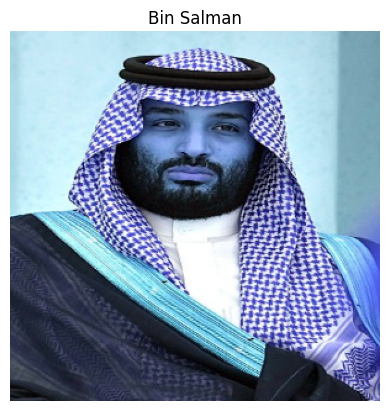

In [7]:
img = r.load_image(flag=1)
r.showImage(img, "Bin Salman")

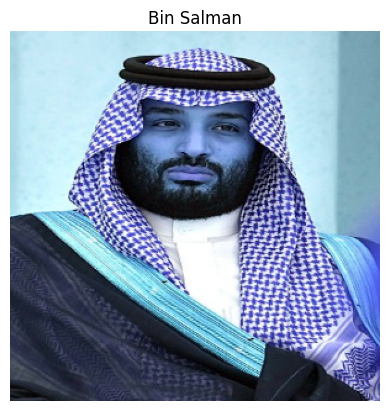

In [8]:
img = r.load_image(flag=-1)
r.showImage(img, "Bin Salman")

## Write Text On Image

#### `cv2.putText()` - Explanation

The `cv2.putText()` function in OpenCV is used to draw text on an image. This can be useful when you want to annotate images with labels, titles, or other types of text-based information. The function allows you to control several aspects of the text, including its position, font, size, color, and thickness.

##### How it works:
- **Image**: You specify the image where the text will be added.
- **Text**: The actual string of text you want to display on the image.
- **Position**: The text is placed at a specific location on the image, specified by the `org` parameter. The position is given as a tuple `(x, y)`, where `x` is the horizontal position and `y` is the vertical position.
- **Font**: You can choose from various fonts (e.g., `cv2.FONT_HERSHEY_SIMPLEX`), with different styles for the text.
- **Font Size**: The size of the text is adjusted with the `fontScale` parameter. The higher the value, the larger the text.
- **Text Color**: The color is specified in BGR (Blue, Green, Red) format, which is OpenCV's default color space.
- **Thickness**: The thickness parameter allows you to adjust the thickness of the text's outline. Thicker lines make the text more prominent.
- **Line Type**: You can select the type of line used to draw the text, with `cv2.LINE_AA` providing a smoother appearance due to anti-aliasing.
- **Text Origin**: The `bottomLeftOrigin` parameter specifies whether the origin (starting point) of the text is at the bottom-left or top-left corner. By default, OpenCV uses the top-left corner.

##### Common Use Cases:
- **Annotations**: Adding labels or descriptions to images, such as adding the name of objects or landmarks.
- **Watermarking**: Placing a watermark or text label over an image to indicate ownership or copyright.
- **Timestamps or Date/Time**: Adding time stamps or date annotations to images, especially for photos or video frames.
- **Graphical User Interfaces (GUIs)**: Displaying dynamic text or messages in OpenCV-based GUI applications.

##### Example Workflow:
1. Load an image using `cv2.imread()`.
2. Use `cv2.putText()` to specify the text, font, size, color, position, and other properties.
3. Display the image with the text using `cv2.imshow()`.
4. Optionally, wait for a key press with `cv2.waitKey()` to keep the window open.
5. Close the window with `cv2.destroyAllWindows()`.

By using `cv2.putText()`, you can easily add textual information to your images, which is useful for various image processing and computer vision tasks.

---

In [9]:
img = r.load_image()
img.shape

(459, 330, 3)

In [10]:
font = cv2.FONT_HERSHEY_SIMPLEX  # Select the font
img = cv2.putText(img, 'Bin Salman', (85, 190), font, 1, (120, 255, 87), 3, cv2.LINE_AA)
r.show_image_with_color(img, 'Bin Salman With Text')

#### Mirror Image

In [11]:
img = cv2.putText(img, 'Bin Salman', (85, 195), font, 1, (255, 120, 255), 3, cv2.LINE_AA, True)
r.show_image_with_color(img, "Mirror Image")

#### Function to write text at the middle of an Image

In [12]:
def writeText(img, text, color=(120, 255, 80), font = cv2.FONT_HERSHEY_SIMPLEX, font_scale = 1, thickness = 3):
    # Get the image dimensions
    h, w = img.shape[:2]
    
    # Calculate the size of the text
    (text_width, text_height), baseline = cv2.getTextSize(text, font, font_scale, thickness)
    
    # Calculate the center position
    center_x = (w - text_width) // 2
    center_y = (h + text_height) // 2  # Add height to vertical center so the text is not cut off
    
    # Put the text on the image
    img = cv2.putText(img, text, (center_x, center_y), font, font_scale, color, thickness, cv2.LINE_AA)

    # Return Image
    return img

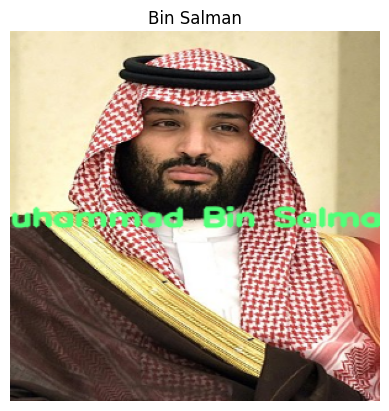

In [13]:
img = r.load_image()
img = r.writeText(img, 'Muhammad Bin Salman')
r.show_image_with_color(img, 'Bin Salman')

## Draw Shapes On Images

#### `cv2.line()` - Explanation

The `cv2.line()` function in OpenCV is used to draw a line on an image. This is commonly used for tasks like drawing borders, connecting points, or highlighting specific areas within an image. The function allows you to control various aspects of the line, including its color, thickness, and type.

##### How it works:
- **Image**: You specify the image where the line will be drawn.
- **Start Point**: The starting point of the line is given by the `pt1` parameter, which is a tuple `(x1, y1)`.
- **End Point**: The end point of the line is specified by the `pt2` parameter, also a tuple `(x2, y2)`.
- **Color**: The color of the line is defined in BGR (Blue, Green, Red) format. For example, `(0, 255, 0)` would be green, and `(0, 0, 255)` would be red.
- **Thickness**: The thickness parameter controls the width of the line. A higher value means a thicker line.
- **Line Type**: You can choose the type of line used. The default is `cv2.LINE_8`, but other options like `cv2.LINE_AA` (anti-aliased lines) can be used for smoother lines.
- **Shift**: The `shift` parameter is used to specify the precision of the coordinates for the points. This is generally used when working with high precision coordinates, and it's not typically needed in most applications.

##### Common Use Cases:
- **Drawing Borders or Dividers**: You can use `cv2.line()` to draw borders or dividers between sections in an image.
- **Visualizing Points or Connections**: For example, drawing lines to connect keypoints in image processing tasks, such as in feature matching or tracking.
- **Image Markup**: Used in applications where you need to highlight specific parts of an image, like in annotation or graphical tools.
- **Geometric Shapes**: Often used as a building block for creating more complex shapes or designs (e.g., polygons or rectangles).

##### Example Workflow:
1. Load an image using `cv2.imread()`.
2. Use `cv2.line()` to specify the starting point, end point, color, and other properties of the line.
3. Display the image with the line using `cv2.imshow()`.
4. Optionally, wait for a key press with `cv2.waitKey()` to keep the window open.
5. Close the window with `cv2.destroyAllWindows()`.

By using `cv2.line()`, you can easily add lines to images for various annotation and visualizations tasks.


In [14]:
img = cv2.imread('data/bin_Salman.jpg')

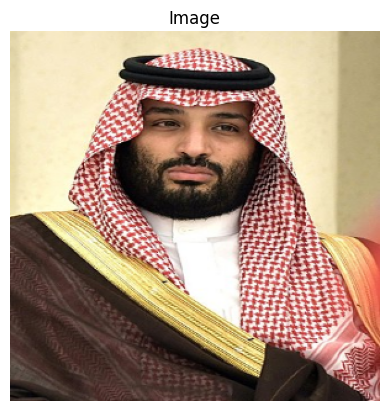

In [15]:
r.show_image_with_color(img, 'Image')

In [16]:
img.shape

(459, 330, 3)

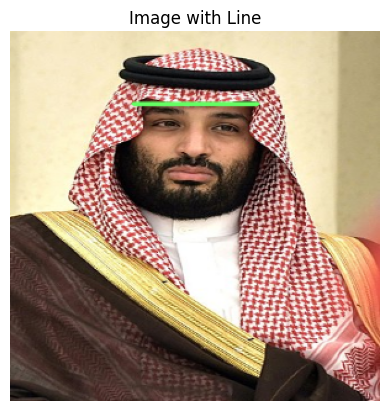

In [17]:
img = cv2.line(img, (110,90), (220,90),  (100, 255, 100), 4, cv2.LINE_AA)
r.show_image_with_color(img, 'Image with Line')

#### `cv2.rectangle()` - Explanation

The `cv2.rectangle()` function in OpenCV is used to draw a rectangle on an image. This is commonly used for highlighting specific regions of interest, creating bounding boxes, or emphasizing certain areas in an image. The function allows you to control several aspects of the rectangle, including its position, color, thickness, and style.

##### How it works:
- **Image**: You specify the image where the rectangle will be drawn.
- **Top-Left Corner**: The `pt1` parameter specifies the top-left corner of the rectangle as a tuple `(x1, y1)`.
- **Bottom-Right Corner**: The `pt2` parameter specifies the bottom-right corner of the rectangle as a tuple `(x2, y2)`.
- **Color**: The color of the rectangle is specified in BGR (Blue, Green, Red) format. For example, `(0, 255, 0)` would be green, and `(0, 0, 255)` would be red.
- **Thickness**: The thickness of the rectangle's border can be set with the `thickness` parameter. If you set the thickness to `-1`, the rectangle will be filled with the given color.
- **Line Type**: You can choose the line type used for drawing the rectangle. The default is `cv2.LINE_8`, but `cv2.LINE_AA` can be used for smoother anti-aliased lines.
- **Shift**: The `shift` parameter is used to specify the precision of the rectangle’s corner coordinates. This is usually not necessary for most applications.

##### Common Use Cases:
- **Bounding Boxes**: Often used in object detection to draw bounding boxes around detected objects.
- **Highlighting Regions**: Used to emphasize or focus attention on specific areas of an image.
- **Image Annotations**: For marking specific locations or drawing attention to important areas in an image.
- **Graphical Overlays**: Used in graphical applications to create dynamic visual elements like buttons or panels.

##### Example Workflow:
1. Load an image using `cv2.imread()`.
2. Use `cv2.rectangle()` to define the top-left and bottom-right corners, color, thickness, and other properties of the rectangle.
3. Display the image with the rectangle using `cv2.imshow()`.
4. Optionally, wait for a key press with `cv2.waitKey()` to keep the window open.
5. Close the window with `cv2.destroyAllWindows()`.

By using `cv2.rectangle()`, you can easily add rectangular shapes to your images for annotations, highlighting, and other visualization tasks.


In [18]:
img = r.load_image()

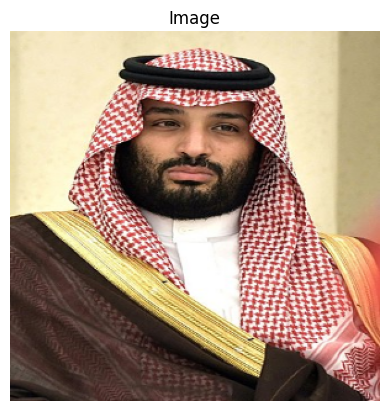

In [19]:
r.show_image_with_color(img, 'Image')

In [20]:
img.shape

(459, 330, 3)

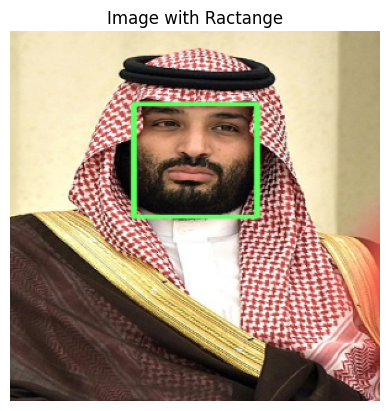

In [21]:
ractange = cv2.rectangle(img, (110,90), (220,230),  (100, 255, 100), 4, cv2.LINE_AA)
r.show_image_with_color(ractange, 'Image with Ractange')

#### `cv2.circle()` - Explanation

The `cv2.circle()` function in OpenCV is used to draw a circle on an image. This is commonly used for marking specific points, creating circular markers, or highlighting areas within an image. The function allows you to control various aspects of the circle, including its center, radius, color, and thickness.

##### How it works:
- **Image**: You specify the image where the circle will be drawn.
- **Center**: The `center` parameter specifies the center of the circle as a tuple `(x, y)`, where `x` is the horizontal position and `y` is the vertical position.
- **Radius**: The `radius` parameter specifies the radius of the circle.
- **Color**: The color of the circle is defined in BGR (Blue, Green, Red) format. For example, `(255, 0, 0)` would be blue, and `(0, 255, 0)` would be green.
- **Thickness**: The `thickness` parameter controls the thickness of the circle's border. If you set this to `-1`, the circle will be filled with the given color.
- **Line Type**: You can choose the line type used for drawing the circle. The default is `cv2.LINE_8`, but `cv2.LINE_AA` can be used for smoother anti-aliased circles.
- **Shift**: The `shift` parameter is used to specify the precision of the circle's center and radius. This is typically not necessary unless dealing with high precision values.

##### Common Use Cases:
- **Marking Points**: Used to highlight specific points or key locations on an image, such as in object detection or tracking.
- **Drawing Circular Markers**: Often used in graphical user interfaces (GUIs) or in visualizations that require circular markers or icons.
- **Highlighting Areas**: Used in tasks like annotation or emphasizing specific regions of interest in an image.
- **Geometric Shape Creation**: A basic tool for creating circles as part of more complex visualizations or overlays.

##### Example Workflow:
1. Load an image using `cv2.imread()`.
2. Use `cv2.circle()` to define the center, radius, color, and other properties of the circle.
3. Display the image with the circle using `cv2.imshow()`.
4. Optionally, wait for a key press with `cv2.waitKey()` to keep the window open.
5. Close the window with `cv2.destroyAllWindows()`.

By using `cv2.circle()`, you can easily add circular shapes to your images for annotation, highlighting, and other graphical tasks.


In [22]:
img = r.load_image()
img.shape

(459, 330, 3)

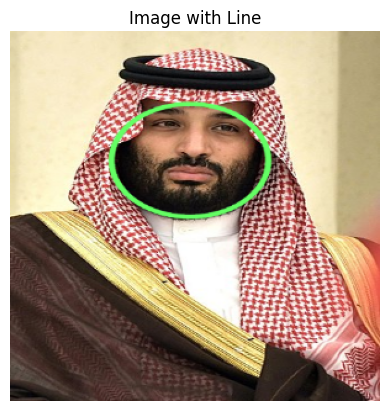

In [23]:
circle = cv2.circle(img, (160,160), 70,  (100, 255, 100), 4, cv2.LINE_AA)
r.show_image_with_color(img, 'Image with Line')

#### `cv2.arrowedLine()` - Explanation

The `cv2.arrowedLine()` function in OpenCV is used to draw an arrowed line on an image. This is useful for indicating direction or highlighting a path, and it can also be used to create arrow markers in visualizations. The function allows you to control various aspects of the arrow, including its position, color, thickness, and tip size.

##### How it works:
- **Image**: You specify the image where the arrowed line will be drawn.
- **Start Point**: The `pt1` parameter specifies the start point of the arrow as a tuple `(x1, y1)`.
- **End Point**: The `pt2` parameter specifies the end point of the arrow as a tuple `(x2, y2)`.
- **Color**: The color of the arrow is defined in BGR (Blue, Green, Red) format. For example, `(0, 255, 0)` would be green, and `(0, 0, 255)` would be red.
- **Thickness**: The `thickness` parameter controls the thickness of the arrow line. A higher value will result in a thicker line.
- **Line Type**: You can choose the type of line used for drawing the arrow. The default is `cv2.LINE_8`, but `cv2.LINE_AA` (anti-aliased lines) can be used for smoother arrows.
- **Tip Length**: The `tipLength` parameter controls the size of the arrowhead (the triangular tip). The default value is `0.1`, which defines the relative size of the arrowhead compared to the length of the arrow line.

##### Common Use Cases:
- **Indicating Direction**: Often used in diagrams or images to indicate a specific direction or path.
- **Drawing Arrows in Visualizations**: Used for annotations in images, such as pointing to specific objects or marking areas of interest.
- **Flow Charts**: Useful in flow diagrams or process maps to visualize the flow of steps or processes.
- **Tracking and Movement**: Can be used in applications like object tracking, where the direction of movement is indicated by an arrow.

##### Example Workflow:
1. Load an image using `cv2.imread()`.
2. Use `cv2.arrowedLine()` to specify the starting and ending points, color, thickness, and tip length of the arrow.
3. Display the image with the arrow using `cv2.imshow()`.
4. Optionally, wait for a key press with `cv2.waitKey()` to keep the window open.
5. Close the window with `cv2.destroyAllWindows()`.

By using `cv2.arrowedLine()`, you can easily draw directional arrows on your images to enhance annotations and visualizations.


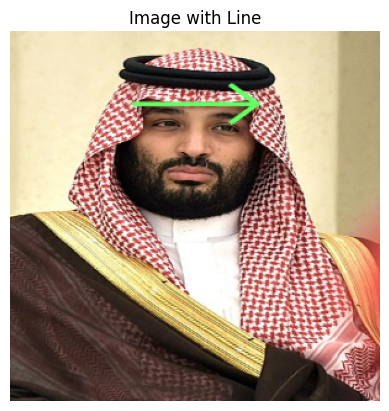

In [24]:
img = r.load_image()
img = cv2.arrowedLine(img, (110,90), (220,90),  (100, 255, 100), 4, cv2.LINE_AA, tipLength=0.3)
r.show_image_with_color(img, 'Image with Line')

#### `cv2.polylines()` - Explanation

The `cv2.polylines()` function in OpenCV is used to draw one or more polygons (or polyline paths) on an image. This is particularly useful for creating shapes, drawing boundaries, or connecting a series of points to represent objects or paths. The function allows you to control various aspects of the polyline, such as its color, thickness, and whether it is closed or open.

##### How it works:
- **Image**: You specify the image where the polyline will be drawn.
- **Points**: The `pts` parameter specifies the points that define the polyline. These points should be provided as a list of points, where each point is a tuple `(x, y)`. If you're drawing multiple polylines, this will be a list of lists.
- **Is Closed**: The `isClosed` parameter is a boolean that indicates whether the polyline should be closed (i.e., the last point is connected to the first point to form a polygon). By default, this is set to `False`, meaning the polyline is open.
- **Color**: The color of the polyline is specified in BGR (Blue, Green, Red) format. For example, `(255, 0, 0)` would be blue, and `(0, 255, 0)` would be green.
- **Thickness**: The `thickness` parameter controls the width of the polyline. A higher value will make the polyline thicker.
- **Line Type**: You can specify the line type used for the polyline, with `cv2.LINE_8` being the default. `cv2.LINE_AA` can be used for anti-aliased lines, which results in smoother edges.
- **Shift**: The `shift` parameter is used to specify the precision of the points’ coordinates. This is typically used for higher precision coordinates.

##### Common Use Cases:
- **Drawing Geometric Shapes**: Used to draw polygons (triangles, rectangles, etc.) by defining multiple points.
- **Path Visualization**: Used for visualizing paths or trajectories in image processing tasks, such as tracking or movement analysis.
- **Object Boundaries**: Useful for marking object boundaries or regions of interest in an image, such as in segmentation tasks or object detection.
- **Annotations**: Ideal for annotating complex shapes or areas in an image, such as highlighting specific features or regions.

##### Example Workflow:
1. Load an image using `cv2.imread()`.
2. Define the points for the polyline (or polygons) as a list of tuples.
3. Use `cv2.polylines()` to specify the points, color, thickness, and other properties.
4. Display the image with the polylines using `cv2.imshow()`.
5. Optionally, wait for a key press with `cv2.waitKey()` to keep the window open.
6. Close the window with `cv2.destroyAllWindows()`.

By using `cv2.polylines()`, you can easily add complex shapes and paths to your images, making it a versatile tool for visual annotations and image processing tasks.


##### 1. Defining the Points for the Polygon (Triangle)

- We define the coordinates of the triangle’s vertices using a NumPy array:
  - `(105, 230)` - bottom-left vertex.
  - `(170, 50)` - top vertex.
  - `(230, 230)` - bottom-right vertex.
- The array uses `np.int32` to store the coordinates as integers, ensuring accurate pixel positioning.

---

##### 2. Reshaping the Points

- The `reshape((-1, 1, 2))` function reshapes the array to match OpenCV’s required format:
  - `-1` auto-determines the number of rows (3 in this case).
  - `1` represents each point as a single `(x, y)` pair.
  - `2` represents the x and y coordinates for each point.

---

##### 3. Why Reshaping is Necessary

- OpenCV’s `cv2.polylines()` function expects the points to be in a specific format: a list of 2D arrays containing `(x, y)` pairs.
- The reshaping ensures that the points are in the correct structure for OpenCV to render the polygon properly.


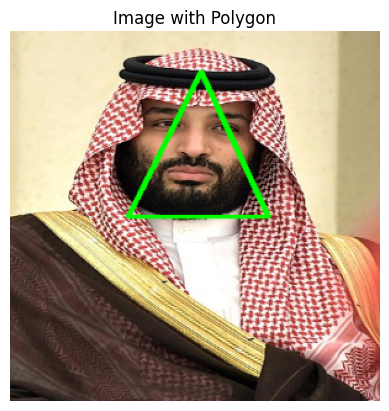

In [25]:
img = r.load_image()
# Define points of a triangle
points = np.array([[105, 230], [170, 50], [230, 230]], np.int32)
points = points.reshape((-1, 1, 2))

# Drawing a polygon (triangle)
img = cv2.polylines(img, [points], isClosed=True, color=(0, 255, 0), thickness=3)

# Show the image with the polygon
r.show_image_with_color(img, 'Image with Polygon')

#### `cv2.ellipse()` - Explanation

The `cv2.ellipse()` function in OpenCV is used to draw an ellipse on an image. An ellipse is a geometric shape that looks like a stretched circle and can be used in various applications such as marking elliptical regions of interest or creating oval shapes for visual emphasis. The function allows you to control several aspects of the ellipse, including its center, axes, angle, color, thickness, and more.

##### How it works:
- **Image**: You specify the image where the ellipse will be drawn.
- **Center**: The `center` parameter specifies the center of the ellipse as a tuple `(x, y)`, where `x` is the horizontal position and `y` is the vertical position.
- **Axes**: The `axes` parameter specifies the lengths of the two axes of the ellipse. This is a tuple `(majorAxisLength, minorAxisLength)`, where `majorAxisLength` is the length of the major axis and `minorAxisLength` is the length of the minor axis.
- **Angle**: The `angle` parameter specifies the rotation angle of the ellipse in degrees. A value of `0` means no rotation.
- **Start Angle**: The `startAngle` parameter specifies the starting angle (in degrees) for the ellipse arc. Typically, this is `0` to start the arc from the "3 o'clock" position.
- **End Angle**: The `endAngle` parameter specifies the ending angle (in degrees) for the ellipse arc. A full ellipse has an end angle of `360`.
- **Color**: The color of the ellipse is defined in BGR (Blue, Green, Red) format. For example, `(0, 255, 0)` would be green, and `(0, 0, 255)` would be red.
- **Thickness**: The thickness parameter controls the width of the ellipse's outline. If you set this to `-1`, the ellipse will be filled with the given color.
- **Line Type**: You can choose the type of line used for drawing the ellipse. The default is `cv2.LINE_8`, but `cv2.LINE_AA` (anti-aliased) provides smoother results.
- **Shift**: The `shift` parameter specifies the precision of the ellipse's center and axes. This is typically not needed unless you're working with high precision coordinates.

##### Common Use Cases:
- **Ellipse Annotation**: Used for highlighting elliptical regions of interest in an image, such as marking or emphasizing specific areas.
- **Object Detection**: Useful in computer vision tasks where objects have an elliptical shape, such as in shape recognition or detection.
- **Visualizations**: Commonly used in visualizations or diagrams where an oval shape is needed, such as in graphical overlays.
- **Tracking**: Can be used to represent motion paths or tracks that follow an elliptical trajectory.

##### Example Workflow:
1. Load an image using `cv2.imread()`.
2. Define the center, axes, angle, color, and other properties of the ellipse.
3. Use `cv2.ellipse()` to draw the ellipse on the image.
4. Display the image with the ellipse using `cv2.imshow()`.
5. Optionally, wait for a key press with `cv2.waitKey()` to keep the window open.
6. Close the window with `cv2.destroyAllWindows()`.

By using `cv2.ellipse()`, you can easily draw ellipses on images for various annotation, detection, and visualization tasks.


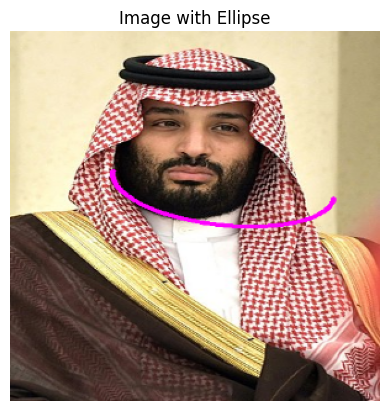

In [26]:
img = cv2.imread('data/bin_Salman.jpg')
# Drawing an ellipse
img = cv2.ellipse(img, (190, 190), (100, 50), 10, 0, 180, (255, 0, 255), 4)

# Show the image with the ellipse
r.show_image_with_color(img, 'Image with Ellipse')

### Draw Multiple Shapes on Image

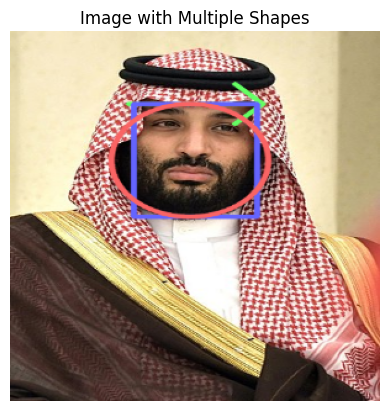

In [27]:
img = r.load_image()
# Drawing multiple shapes
img = cv2.arrowedLine(img, (105,90), (225,90),  (100, 255, 100), 4, cv2.LINE_AA, tipLength=0.3)
ractange = cv2.rectangle(img, (110,90), (220,230),  (255, 100, 100), 4, cv2.LINE_AA)
circle = cv2.circle(img, (160,160), 70,  (100, 100, 250), 4, cv2.LINE_AA)
# Show the image with multiple shapes
r.show_image_with_color(img, 'Image with Multiple Shapes')

## Combine Shapes and Text

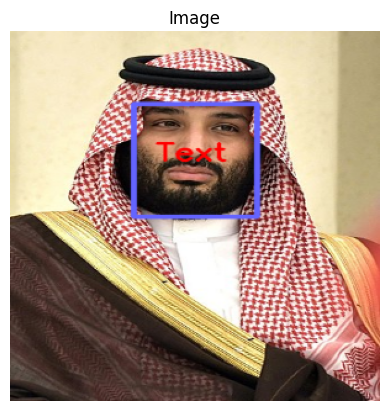

In [28]:
img = r.load_image()
font = cv2.FONT_HERSHEY_SIMPLEX  # Select the font
img = cv2.putText(img, 'Text', (130, 160), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
ractange = cv2.rectangle(img, (110,90), (220,230),  (255, 100, 100), 4, cv2.LINE_AA)
r.show_image_with_color(ractange, 'Image')

#### Write text on the center of ractangle

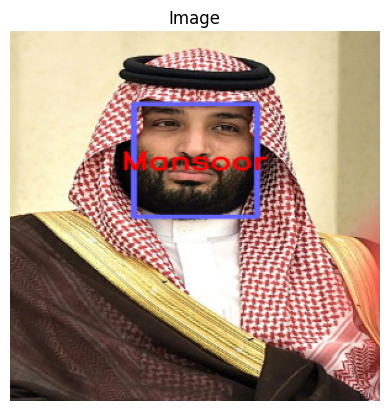

In [29]:
img = r.load_image()

# Select the font
font = cv2.FONT_HERSHEY_SIMPLEX  

# Define the rectangle position
top_left = (110, 90)
bottom_right = (220, 230)

# Draw the rectangle
img = cv2.rectangle(img, top_left, bottom_right, (255, 100, 100), 4, cv2.LINE_AA)

# Get the text size
text = 'Mansoor'
(text_width, text_height), baseline = cv2.getTextSize(text, font, 1, 2)

# Calculate the position to center the text
x = top_left[0] + (bottom_right[0] - top_left[0] - text_width) // 2
y = top_left[1] + (bottom_right[1] - top_left[1] + text_height) // 2

# Put the text at the calculated position
img = cv2.putText(img, text, (x, y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

# Show the image with the centered text
r.show_image_with_color(img, 'Image')
